In [34]:
import pachi_py
import numpy as np
from gym.envs.board_game.go import _coord_to_action, GoState, _action_to_coord

# https://github.com/openai/gym/blob/go/gym/envs/board_game/go.py

In [41]:
np.random.choice([1,2,3,4,5])

5

In [57]:
class Player():
    def __init__(self, colour):
        self.colour = colour
        
    def act(self, state):
        assert state.color == self.colour
        la = self.get_legal_actions(state.board, self.colour)
        a = np.random.choice(la)
        return a
        
    def get_legal_actions(self, board, color):
        cs = board.get_legal_coords(color)
        a = [_coord_to_action(board, c) for c in cs]
        return a

In [69]:
class TrainingEnvironment():
    
    def __init__(self, black_player, white_player):
        
        self.players = {pachi_py.BLACK: black_player,
                        pachi_py.WHITE: white_player}
        self.reset()
    
    def run(self):
        while not self.state.board.is_terminal:
            action = self.players[self.current_player].act(self.state)
            self.state = self.state.act(action)
            self.current_player = self.state.color
            
        print('INFO: Game is terminated. Score: {}'.format(self.state.board.official_score))
            
    def reset(self):
        self.state = GoState(pachi_py.CreateBoard(9), pachi_py.BLACK)
        self.current_player = pachi_py.BLACK

In [70]:
black = Player(pachi_py.BLACK)
white = Player(pachi_py.WHITE)
env = TrainingEnvironment(black, white)

In [71]:
env.run()

INFO: Game is terminated. Score: 48.0


In [72]:
env.state

To play: black
Move:  147  Komi: 0.0  Handicap: 0  Captures B: 12 W: 57
      A B C D E F G H J  
    +-------------------+
  9 | O O O O O O O O O |
  8 | O O O O O O O O O |
  7 | O O O O O O O X O |
  6 | O O O O O O X X O |
  5 | O O O O O O O X O |
  4 | O O . O O X X X O |
  3 | O O O O O O X X X |
  2 | O O O X . X O X . |
  1 | O O O O O O O X X |
    +-------------------+

In [68]:
env.state.board.official_score

-61.0

In [51]:
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
file_name = os.path.join('batch', os.listdir('batch')[0])
ob, a, p = joblib.load(file_name)

In [75]:
ob_rot90 = ob.copy()
for i, v in enumerate(ob):
    ob_rot90[i] = np.rot90(v, axes=(0, 1))
    
ob_rot180 = ob.copy()
for i, v in enumerate(ob_rot90):
    ob_rot180[i] = np.rot90(v, axes=(0, 1))
    
ob_rot270 = ob.copy()
for i, v in enumerate(ob_rot270):
    ob_rot270[i] = np.rot90(v, axes=(0, 1))    

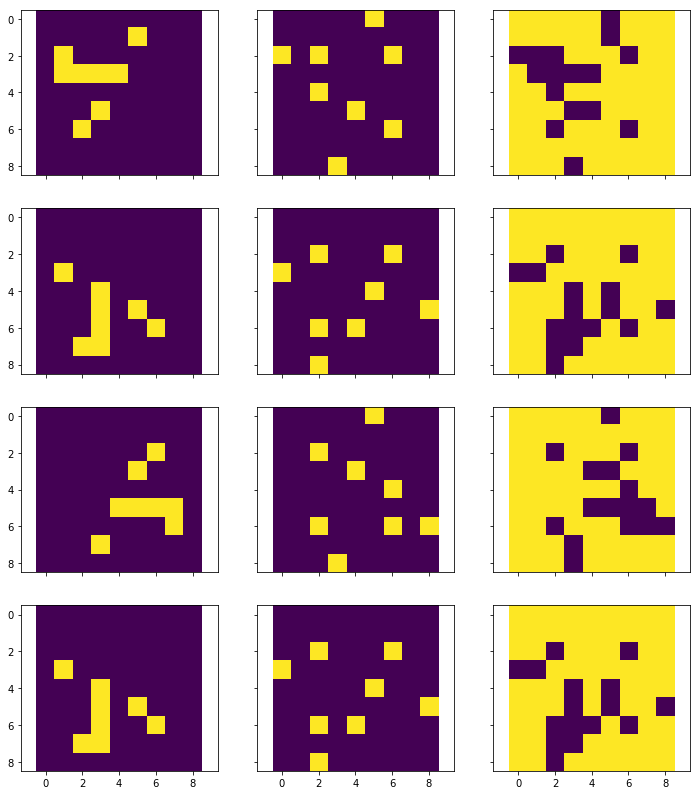

In [83]:
ind = 36
fig, ax = plt.subplots(4, 3, figsize=(12, 14), sharex=True, sharey=True)

for i in range(3):
    ax[0, i].imshow(ob[ind, :, :, i])
    
for i in range(3):
    ax[1, i].imshow(ob_rot90[ind, :, :, i])    

for i in range(3):
    ax[2, i].imshow(ob_rot180[ind, :, :, i])    
    
for i in range(3):
    ax[3, i].imshow(ob_rot270[ind, :, :, i])        

In [93]:
ob_flip = ob.copy()
for i, v in enumerate(ob):
    ob_flip[i] = np.flip(v, axis=0)
    
ob_f90 = ob_flip.copy()
for i, v in enumerate(ob_flip):
    ob_f90[i] = np.rot90(v, axes=(0, 1))
    
ob_f180 = ob_flip.copy()
for i, v in enumerate(ob_f90):
    ob_f180[i] = np.rot90(v, axes=(0, 1))
    
ob_f270 = ob_flip.copy()
for i, v in enumerate(ob_f180):
    ob_f270[i] = np.rot90(v, axes=(0, 1))    

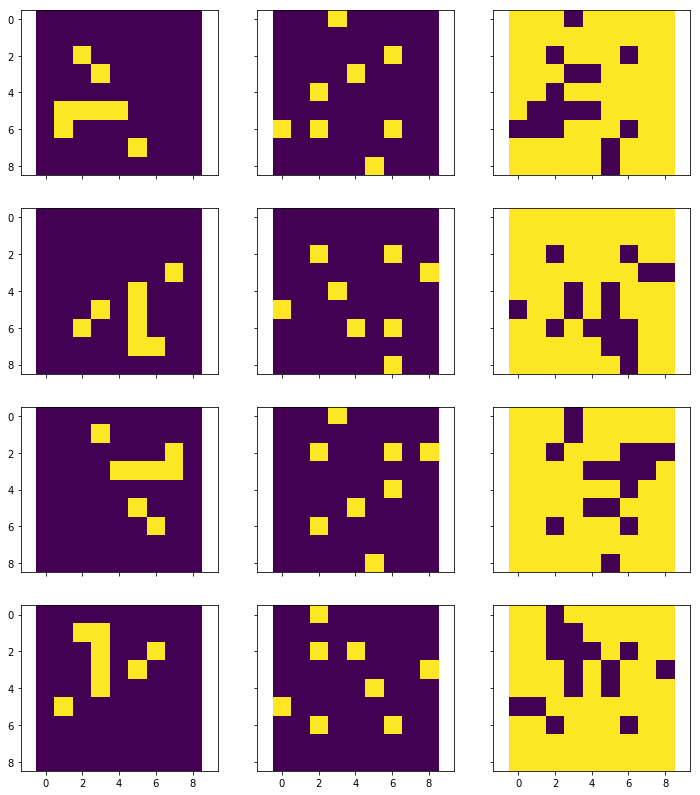

In [94]:
ind = 36
fig, ax = plt.subplots(4, 3, figsize=(12, 14), sharex=True, sharey=True)

for i in range(3):
    ax[0, i].imshow(ob_flip[ind, :, :, i])
    
for i in range(3):
    ax[1, i].imshow(ob_f90[ind, :, :, i])    

for i in range(3):
    ax[2, i].imshow(ob_f180[ind, :, :, i])    
    
for i in range(3):
    ax[3, i].imshow(ob_f270[ind, :, :, i])        